In [1]:
#This is the python file for testing
from QPE import QPhe_qiskit
from qiskit.circuit.library.standard_gates import HGate

In [2]:
qphe=QPhe_qiskit(3, 3)
qphe.set_unitary([(HGate(), [0])])
qphe.construct_circuit()
# qphe.compute_result()  

In [3]:
circuit=qphe.circuit

c:\Users\manvi\Documents\DynamicCircuit\yalehack\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


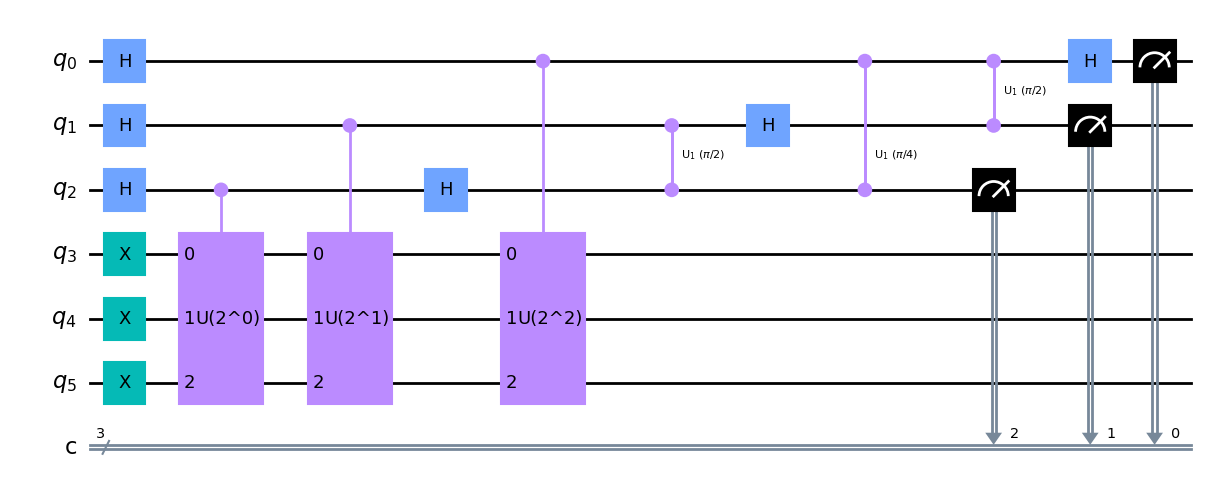

In [4]:
circuit.draw(output='mpl')

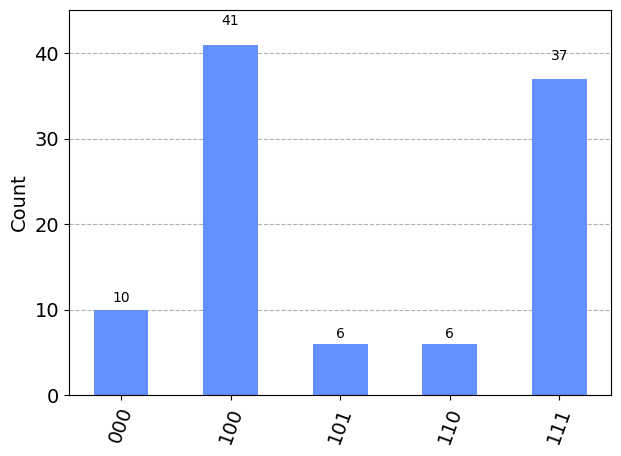

In [5]:
qphe.show_measure_all(100)

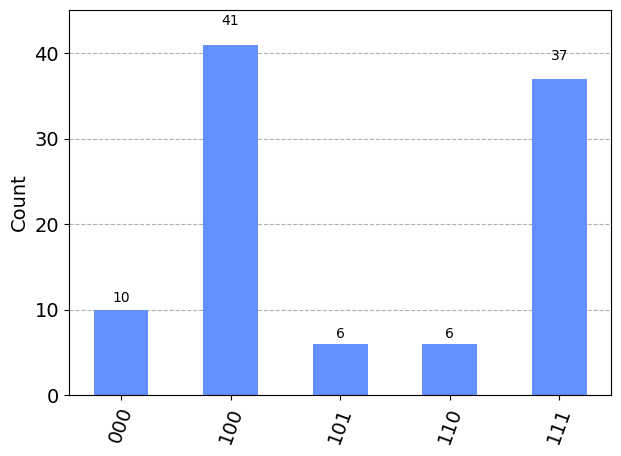

In [6]:
qphe.show_measure_all(200)

In [7]:
from noise import *

noise_model=construct_bitflip_noise_model(0.1, 0.1, 0.1)

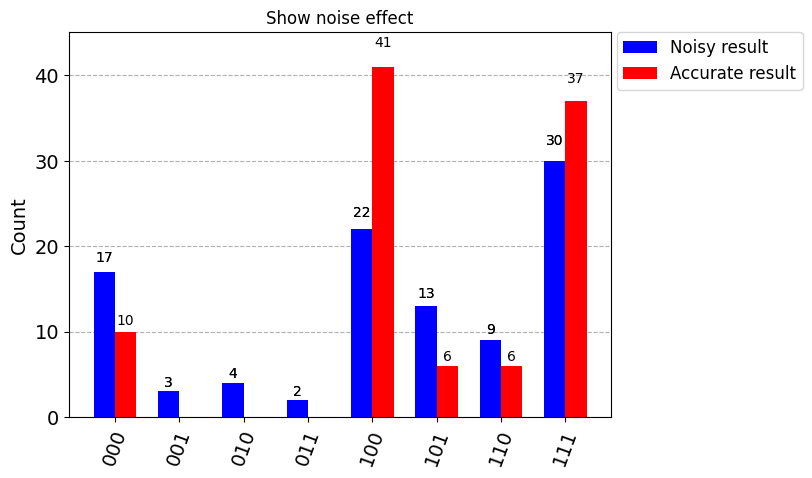

In [8]:
qphe.add_noise_model(noise_model)
qphe.show_noise_effect(100)